In [75]:
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import seaborn as sns
import pickle as pkl
from core import *

In [76]:
background_dir = "./Data/background_yarrays"
virus_dir = "./Data/yarrays"

In [90]:
with open(f"{background_dir}/background_all_y.pkl",'rb') as infile:
    background_yarrays = pkl.load(infile)
with open(f"{virus_dir}/virus_all_y.pkl",'rb') as infile:
    virus_yarrays = pkl.load(infile)

array([[[0.50000012-0.50000001j, 1.00000001-1.00000026j],
        [0.50000012-0.50000001j, 1.00000001-1.00000026j]],

       [[0.50000027+0.50000018j, 1.00000001+1.00000008j],
        [0.50000027+0.50000018j, 1.00000001+1.00000008j]],

       [[0.50000024-0.4999999j , 1.00000001-1.00000012j],
        [0.50000024-0.4999999j , 1.00000001-1.00000012j]],

       [[0.50000022+0.49999976j, 0.99999977+1.00000019j],
        [0.50000022+0.49999976j, 0.99999977+1.00000019j]],

       [[0.50000011-0.49999971j, 0.99999955-1.00000006j],
        [0.50000011-0.49999971j, 0.99999955-1.00000006j]],

       [[0.50000033+0.49999986j, 0.99999946+1.0000001j ],
        [0.50000033+0.49999986j, 0.99999946+1.0000001j ]],

       [[0.50000025-0.49999992j, 0.9999992 -1.00000006j],
        [0.50000025-0.49999992j, 0.9999992 -1.00000006j]],

       [[0.50000001+0.49999991j, 0.9999991 +0.99999994j],
        [0.50000001+0.49999991j, 0.9999991 +0.99999994j]],

       [[0.50000013-0.50000005j, 0.99999888-0.99999999j]

In [78]:
y0 = np.array([[complex(0.5,0.5),complex(1,1)],[complex(0.5,0.5),complex(1,1)]])

all_y = np.zeros((10,20,2,2),dtype="complex128")

for i in range(10):

    def Y(y,t):
        seq = DNA(5)
        alg = Sequence(seq).run()
        y_t = matrix_multiply(y,expm(alg))
        return y_t

    y_array = np.zeros((20,2,2),dtype="complex128")
    y = y0
    for n in range(20):
        y = rkmk_step(Y,y,n)
        y_array[n] = y

    all_y[i-1] = y_array

In [79]:
def matrix_vector_multiply(m,v,vector_type="row"):
    if vector_type == "row":
        return np.array([np.vdot(v,i) for i in m.T])
    elif vector_type == "column":
        return np.array([np.vdot(i,v) for i in m])

def vector_multiply(v1,v2):
    return np.vdot(v1,v2)

In [80]:
def random_complex_vector(n_components=2):
    vals = np.random.rand(n_components,2)
    vector = np.zeros(n_components,dtype="complex128")
    for i in range(n_components):
        vector[i] = complex(vals[i,0],vals[i,1])
    return vector

In [81]:
random_complex_vector()

array([0.86790372+0.92062319j, 0.67220254+0.3856258j ])

In [82]:
all_y[0].shape

(20, 2, 2)

In [92]:
v1 = random_complex_vector()
v2 = v1
vvr = v1
vvc = v1
v1s = []
v2s = []
vvr = []
vvc = []

In [93]:
for i in all_y[0]:
    v1 = matrix_vector_multiply(i,v1)
    v1s.append(v1)
    print(v1)

[0.15989654-1.21760471j 0.31979301-2.43520965j]
[-1.58656267+2.06625185j -3.17312438+4.13250418j]
[ -5.47922132-0.71953371j -10.95844395-1.43907064j]
[ -9.29813474 -7.13953153j -18.59627409-14.2790593j ]
[-3.23791212+24.65650212j -6.47582659+49.31300337j]
[32.12788129-41.84162873j 64.25577303-83.6832531j ]
[110.95426219+14.57063835j 221.90856436+29.1412434j ]
[188.28733   +144.57541572j 376.57475313+289.15097375j]
[ 65.56793271-499.29407657j 131.13577172-998.58869281j]
[ -650.58923973 +847.29291118j -1301.17919194+1694.58687624j]
[-2246.82259647-295.05523392j -4493.64880184-590.11165482j]
[-3812.81611444-2927.65174082j -7625.64100883-5855.30494765j]
[-1327.74827984+10110.69946551j -2655.50461933+20221.41974959j]
[13174.42624024-17157.66925159j 26348.86970691-34315.3816125j ]
[45498.13099484 +5974.87349867j 90996.36757878+11949.77471067j]
[ 77209.49901012 +59284.86991638j 154419.21353711+118569.85998354j]
[26886.95071766-204741.51393881j 53774.11217611-409483.58315902j]
[-266781.7874173

In [94]:
for i in all_y[0]:
    v2 = matrix_vector_multiply(i,v2,"column")
    v2s.append(v2)
    print(v2)

[0.17884703+1.59905719j 0.17884703+1.59905719j]
[2.66685627+2.13031532j 2.66685627+2.13031532j]
[0.8048118+7.19575768j 0.8048118+7.19575768j]
[12.00085444+9.58642073j 12.00085444+9.58642073j]
[3.62165562+32.38091549j 3.62165562+32.38091549j]
[54.00386004+43.13889595j 54.00386004+43.13889595j]
[16.29746362+145.71414409j 16.29746362+145.71414409j]
[243.01740197+194.12503237j 243.01740197+194.12503237j]
[73.33862549+655.71367929j 73.33862549+655.71367929j]
[1093.57839491+873.56263058j 1093.57839491+873.56263058j]
[330.02359102+2950.71113079j 330.02359102+2950.71113079j]
[4921.10201839+3931.03118729j 4921.10201839+3931.03118729j]
[1485.1072404+13278.19917126j 1485.1072404+13278.19917126j]
[22144.95735742+17689.63516691j 22144.95735742+17689.63516691j]
[6682.99038121+59751.87946847j 6682.99038121+59751.87946847j]
[99652.28462142+79603.33517345j 99652.28462142+79603.33517345j]
[30073.46355892+268883.40136788j 30073.46355892+268883.40136788j]
[448435.22647642+358214.97490084j 448435.22647642+

In [100]:
for i in range(20):
    print(np.abs(v1s[i]),np.abs(v2s[i]))

[1.22805868 2.45611759] [1.6090277 1.6090277]
[2.60510611 5.21021201] [3.41326321 3.41326321]
[ 5.52626411 11.05252994] [7.24062501 7.24062501]
[11.72297829 23.44595796] [15.35968652 15.35968652]
[24.86819599 49.73639142] [32.58281874 32.58281874]
[ 52.75341364 105.50683019] [69.11860273 69.11860273]
[111.90688898 223.81381326] [146.62271007 146.62271007]
[237.39033146 474.78082345] [311.03373749 311.03373749]
[ 503.58090581 1007.1623345 ] [659.80223037 659.80223037]
[1068.25635321 2136.51397624] [1399.65187649 1399.65187649]
[2266.1132741  4532.23028094] [2969.10958841 2969.10958841]
[4807.15211306 9614.3120828 ] [6298.43244552 6298.43244552]
[10197.50749823 20395.0366872 ] [13360.99235638 13360.99235638]
[21632.17790484 43264.40049328] [28342.9414264 28342.9414264]
[45888.76809579 91777.64449019] [60124.44977253 60124.44977253]
[ 97344.76122728 194689.76656706] [127543.2036645 127543.2036645]
[206499.38413673 412999.34626713] [270559.96884534 270559.96884534]
[438051.28920356 876103.

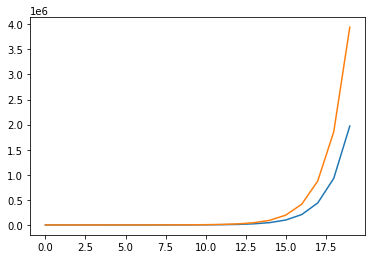

In [96]:
plt.plot(np.arange(0,20),np.abs(v1s))

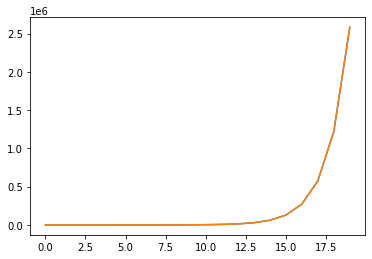

In [97]:
plt.plot(np.arange(0,20),np.abs(v2s))

In [99]:
for i in virus_yarrays[0]:
    vvc = matrix_vector_multiply(i,vvc,"column")
    vvc.append(vvc)
    print(vvc)

[608984.38497041+5444886.68878634j 608984.38497041+5444886.68878634j]
[9080808.20115147+7253854.84864587j 9080808.20115147+7253854.84864587j]
[2740432.12034949+24501996.53346215j 2740432.12034949+24501996.53346215j]
[40863641.73703179+32642346.44998041j 40863641.73703179+32642346.44998041j]
[12331936.33178596+1.10258962e+08j 12331936.33178596+1.10258962e+08j]
[1.8388634e+08+1.46890516e+08j 1.8388634e+08+1.46890516e+08j]
[55493638.59369749+4.96165201e+08j 55493638.59369749+4.96165201e+08j]
[8.27488137e+08+6.6100691e+08j 8.27488137e+08+6.6100691e+08j]
[2.49720997e+08+2.23274195e+09j 2.49720997e+08+2.23274195e+09j]
[3.72369376e+09+2.97452993e+09j 3.72369376e+09+2.97452993e+09j]
[1.12374384e+09+1.00473336e+10j 1.12374384e+09+1.00473336e+10j]
[1.67566178e+10+1.33853788e+10j 1.67566178e+10+1.33853788e+10j]
[5.05684233e+09+4.52129941e+10j 5.05684233e+09+4.52129941e+10j]
[7.54047697e+10+6.02342071e+10j 7.54047697e+10+6.02342071e+10j]
[2.27558262e+10+2.03458463e+11j 2.27558262e+10+2.03458463e+1

In [ ]:
for i in virus_yarrays[0]:
    vvr = matrix_vector_multiply(i,vvr,"row")
    vvr.append(vvr)
    print(vvr)

In [101]:
for i in range(20):
    print(np.abs(v1s[i]),np.abs(v2s[i]), np.abs(vvr[i]), np.abs(vvc[i]))

[1.22805868 2.45611759] [1.6090277 1.6090277] [5478836.83229027 5478836.83229027]
[2.60510611 5.21021201] [3.41326321 3.41326321] [11622370.1434485 11622370.1434485]
[ 5.52626411 11.05252994] [7.24062501 7.24062501] [24654772.40479081 24654772.40479081]
[11.72297829 23.44595796] [15.35968652 15.35968652] [52300669.19048966 52300669.19048966]
[24.86819599 49.73639142] [32.58281874 32.58281874] [1.10946452e+08 1.10946452e+08]
[ 52.75341364 105.50683019] [69.11860273 69.11860273] [2.35352948e+08 2.35352948e+08]
[111.90688898 223.81381326] [146.62271007 146.62271007] [4.99258901e+08 4.99258901e+08]
[237.39033146 474.78082345] [311.03373749 311.03373749] [1.0590877e+09 1.0590877e+09]
[ 503.58090581 1007.1623345 ] [659.80223037 659.80223037] [2.24666357e+09 2.24666357e+09]
[1068.25635321 2136.51397624] [1399.65187649 1399.65187649] [4.76589169e+09 4.76589169e+09]
[2266.1132741  4532.23028094] [2969.10958841 2969.10958841] [1.01099808e+10 1.01099808e+10]
[4807.15211306 9614.3120828 ] [6298.43